# Lab: Titanic Survival Exploration with Decision Trees

## Getting Started
In this lab, you will see how decision trees work by implementing a decision tree in sklearn.

We'll start by loading the dataset and displaying some of its rows.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [4]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())
display(outcomes.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

## Preprocessing the data

Now, let's do some data preprocessing. First, we'll one-hot encode the features.

In [5]:
features = pd.get_dummies(features_raw)  #this ignore if category is none when dummy_na when False (default) Nans aare ignored
features.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


And now we'll fill in any blanks with zeroes.

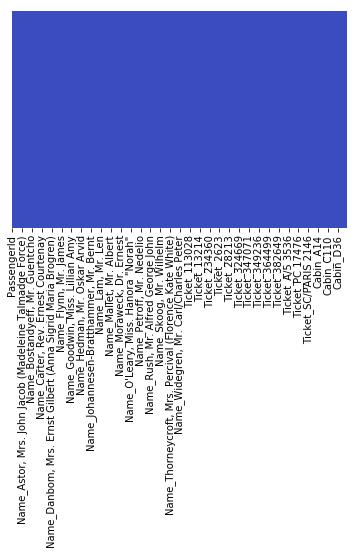

In [6]:
import seaborn as sns
sns.heatmap(features,yticklabels=False,cbar=False,cmap='coolwarm')

In [7]:
features = features.fillna(0.0)
display(features.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## (TODO) Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [14]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [53]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('The test confusion matrix is \n', confusion_matrix(y_test, y_test_pred))
print('classification_report \n',classification_report(y_test, y_test_pred))

The training accuracy is 0.870786516854
The test accuracy is 0.854748603352
The test confusion matrix is 
 [[95 10]
 [16 58]]
classification_report 
              precision    recall  f1-score   support

          0       0.86      0.90      0.88       105
          1       0.85      0.78      0.82        74

avg / total       0.85      0.85      0.85       179



# Exercise: Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`

You can use your intuition, trial and error, or even better, feel free to use Grid Search!

**Challenge:** Try to get to 85% accuracy on the testing set. If you'd like a hint, take a look at the solutions notebook next.

In [70]:
model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=6,min_samples_split=4)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('The train confusion matrix is \n', confusion_matrix(y_train, y_train_pred))
print('The test confusion matrix is \n', confusion_matrix(y_test, y_test_pred))
print('classification_report \n',classification_report(y_test, y_test_pred))
y_test_entire_pred = model.predict(features)
print('The test accuracy entire dataset', accuracy_score(outcomes, y_test_entire_pred))


# TODO: Train the model

# TODO: Make predictions

# TODO: Calculate the accuracy

The training accuracy is 0.875
The test accuracy is 0.860335195531
The train confusion matrix is 
 [[418  26]
 [ 63 205]]
The test confusion matrix is 
 [[96  9]
 [16 58]]
classification_report 
              precision    recall  f1-score   support

          0       0.86      0.91      0.88       105
          1       0.87      0.78      0.82        74

avg / total       0.86      0.86      0.86       179

The test accuracy entire dataset 0.872053872054


In [41]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [63]:
parameters = {'max_depth':[4,6,8,10,12,14], 'min_samples_leaf':[2,4,6,8],'min_samples_split':[4,6,8,10,12,14]}

cv_list=[3,5,7,10]   #cv=[]
for i in range(3,12,2):
    model_ = DecisionTreeClassifier()
    model = GridSearchCV(model_, parameters,cv=i)
    model.fit(X_train,y_train)

    print(model.best_params_)

    #model.best_estimator_


{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 4}
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 14}
{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 4}
{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 14}
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 14}


In [64]:
parameters = {'max_depth':[4,6,8,10,12,14], 'min_samples_leaf':[2,4,6,8],'min_samples_split':[4,6,8,10,12,14]}

cv_list=[3,5,7,10]
for i in range(3,12,2):
    model_ = DecisionTreeClassifier(random_state=0)
    model = GridSearchCV(model_, parameters,cv=i)
    model.fit(X_train,y_train)

    print(model.best_params_)

{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 14}
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 14}
{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 14}
{'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 4}
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 14}
